### Apr. 19

Non-ramping case
1 kg salt, ususal setup

h1 = h2 = 8 cm
d = 25.5 cm

t = 2min

0.6 V

0.7 V

0.75 V

0.8 V

0.85 V

0.9 V

1 V

1.1 V

1.2 V (resonance? )

1.25 V (resonance)

1.3 V

1.35 V

1.4 V

1.45 V

1.5  V



### Ramping case:


fmin = 0.6 V , fmax = 1.6

5 sec / 0.01 V  1. vid
 
2 sec / 0.01 V 2 . vid

5 sec / 0.01 V 3. vid visszafelé: fmin = 1.8 V fmax = 0.8



density profile at the end of the experiments



In [ ]:
d = [51.7, 51.7, 51.6, 51.1, 50.4, 49.1, 48.8, 45.0, 33.4, 25.3, 9.14, 1.2, 0.9, 0.6, 0.5, 0.5, 0.5, 0.]

In [ ]:
len(d)

|0.7 V| 0:34 | 0:39|
|0.75 V| 0:3| 0:2|
|0.8 V| 0:4| 0:7|
|0.85V |0:3| 0:2|
|0.9V| 0:3|0:6|
        |1V| 0:3|0:8|
|1.1V|0:3| 0:5|
|1.2V|0:2| 0:3 |
|1.25V|0:2| 0:3|
|1.3V|0:2| 0:4|
|1.35V|0:2|0:7|
|1.4V|0:3|0:2|
|1.45V| 0:2| 0:3|
|1.5V|0:3|0:4|
|0.6V|0:1|0:3|

|lassu rampa| 0:16| 'oke, akkor megy'|
|gyors rampa| 0:2| '2 masodpercenkent tekerek egyet'|

In [ ]:
interface_vids = ['reference', '07V', '075V', '08V', '085V', '09V', '1V' , '11V', '12V', '125V', '13V', '135V', '14V', '145V', '15V','16V', 'rampSlow', 'quickRamp']

#### Data analysis

- Each video is 2 minutes long
- split the video to frames (grayscale)
- filter outliers
- Syncronize timeseries
- FT - avg on driving timeseries -> single maximal frequency
- Difference between surface deviation and interface deviation
- FT on this timeseries -> Single maximal amplitude
- Same with interface width

In [4]:
%cd "D:Interfacial Waves resonance videos 0419"

D:\Interfacial Waves resonance videos 0419


In [5]:
%cd interfaceResponse/

D:\Interfacial Waves resonance videos 0419\interfaceResponse


In [6]:
import cv2
def splitToFrames(src):
    %mkdir $src
    vidcap = cv2.VideoCapture('%s.mp4' %src)
    success,image = vidcap.read()
    count = 0
    while success:
        cv2.imwrite("%s/frame%d.jpg" %(src,count), image)     # save frame as JPEG file      
        success,image = vidcap.read()
        #print('Read a new frame: ', count )
        count += 1
    print('%s Done \n' %src)
    

In [ ]:
for vid in interface_vids:
    splitToFrames(vid)

In [ ]:
splitToFrames('reference')
splitToFrames('nodriving')

## Loading reference image

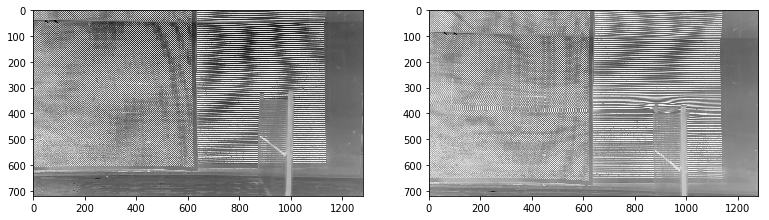

In [8]:
import numpy as np
import matplotlib.pyplot as plt
water = cv2.flip(cv2.imread("reference/frame100.jpg", cv2.IMREAD_GRAYSCALE), -1)
img = cv2.flip(cv2.imread("12V/frame100.jpg", cv2.IMREAD_GRAYSCALE), -1)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,8))
ax1.imshow(water, cmap='Greys')
ax2.imshow(img, cmap='Greys')
plt.show()

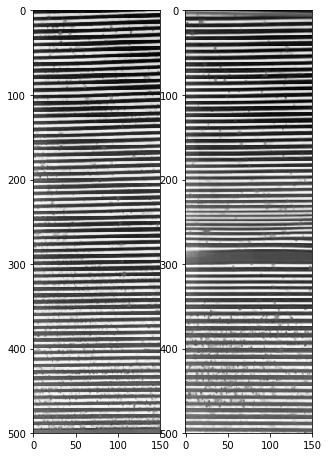

In [12]:
imgcut = img[100:600, 650:800]
refcut = water[100:600, 650:800]
f, (ax1, ax2) = plt.subplots(1,2, figsize=(5,13))
ax1.imshow(refcut, cmap='Greys')
ax2.imshow(imgcut, cmap='Greys')

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
refref = refcut[:, 100]
imgref = imgcut[:, 100]

peaksimg, _ = find_peaks(255.-imgref, height=125)
peaks, _ = find_peaks(255.-refref, height=125)

In [14]:
def read_file(src):
    img = cv2.flip(cv2.imread(src, cv2.IMREAD_GRAYSCALE), -1)
    return img

def printMaxAmpl(img, ref, col, loc):
    img = img[100:600, loc[0]:loc[1]]
    #ref = ref[180:550, 600:700]
    cv2.equalizeHist(img)

    imgref = img[:,col]
    refref = ref[:,col]
    peaksimg, _ = find_peaks(255.-imgref, height=120)
    peaks, _ = find_peaks(255.-refref, height=120)
    shorter =  np.min([len(peaksimg), len(peaks)])
    peaksimgcut = peaksimg[:shorter]
    peakscut = peaks[:shorter]
    maxplace = np.argmax(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))
    return [maxplace, np.max(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))]


In [2]:
import os


In [16]:
def measureInterface(src):
    ls = os.listdir(src) # list
    number_files = len(ls)

    ampls = []
    for i in range(number_files):
        #print(i)
        img = read_file("%s/frame%s.jpg" %(src,i))
        amplsincol = []
        ampls.append(printMaxAmpl(img, refcut,100, [650, 800]))
    return np.array(ampls)

def saveDataset(src):
    ampls = measureInterface(src)
    np.savetxt("measured/%s.txt" %src, ampls)
    print('%s Done \n' %src)

noRampVids = ['06V', '07V', '075V', '08V', '085V', '09V', '1V' , '11V', '12V', '125V', '13V', '135V', '14V', '145V', '15V']

In [17]:
for v in noRampVids:
    saveDataset(v)

06V Done 

07V Done 

075V Done 

08V Done 

085V Done 

09V Done 

1V Done 

11V Done 

12V Done 

125V Done 

13V Done 

135V Done 

14V Done 

145V Done 

15V Done 



### Diagnostics


In [22]:
def filterOnce(original):
    filtered = original.copy()
    avg = np.average(original)
    std = np.std(original)

    divs = np.abs(original-avg)> 3*std
    index = np.arange(0, len(original), 1)
    filtered[index[divs]] = filtered[index[divs]-1]
    #print(np.sum(divs))
    return filtered

def filterUntilSmooth(original):
    filtered = original.copy()
    avg = np.average(original)
    std = np.std(original)
    div = np.abs(original-avg) > 3*std
    while(np.sum(div)>0):
        filtered = filterOnce(filtered)
        avg = np.average(filtered)
        std = np.std(filtered)
        div = np.abs(filtered-avg)> 3*std
    return filtered


In [25]:
for v in noRampVids:
    plt.clf()
    asd = np.loadtxt('measured/%s.txt' %v)
    asd[:,0] = filterUntilSmooth(asd[:,0])
    f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(13,5))
    ax1.plot(np.arange(0., asd.shape[0], 1)/29.18, asd[:,0],'-o', markersize=0.6)
    ax2.plot(np.arange(0., asd.shape[0], 1)/29.18, asd[:,0],'-o', markersize=0.6)
    ax3.plot(np.arange(0., asd.shape[0], 1)/29.18, asd[:,1],'-o', markersize=0.6)
    ax2.set_xlabel('Time')
    ax1.set_xlabel('Time')
    ax3.set_xlabel('Time')
    ax1.set_ylabel('Interface position')
    ax2.set_ylabel('Interface position')
    ax3.set_ylabel('Interface width')
    ax2.set_xlim(50., 90.,)
    plt.savefig('measured/pictures/%s.png' %v, bbox_inches='tight')
    plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

In [78]:
from scipy.fftpack import fft,fftfreq
import matplotlib.pyplot as plt
for v in noRampVids:
    plt.clf()
    asd = filterUntilSmooth(np.loadtxt('measured/%s.txt' %v)[:,0][1000:])
    dt=1./29.18
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,5))

    np_fft = np.fft.fft(asd-np.average(asd))
    n_samples = len(asd)

    amplitudes = 2./n_samples * np.abs(np_fft) 
    frequencies = np.fft.fftfreq(n_samples) * n_samples * dt
    filt = frequencies>0.1
    ax2.text(2, 0.7*np.max(amplitudes), r"Max Amplitude at %s, Amplitude: %s, Period: %s " %(round(frequencies[:len(frequencies)//2][np.argmax(amplitudes[filt])],3), round(np.max(amplitudes[filt]), 3), round(1./(np.argmax(amplitudes[filt])*dt))))
    ax2.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])
    ax2.set_xlabel('Frequency')
    ax2.set_ylabel('Amplitude')
    ax1.plot(np.linspace(0, n_samples*dt, n_samples), asd, '-o', markersize=1)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    plt.savefig('measured/pictures/fft_%s.png' %v, bbox_inches='tight')
    plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>